# Initial data analysis and Linear Regression

This assignment is dedicated to Linear regression. By focusing on prediction different features of football players you understand the mathematics behind it and see the usefulness of main data analysis libraries.

**Materials**
- [Documentation](http://docs.scipy.org/doc/) libraries Numpy and SciPy
- [Documentation](http://matplotlib.org/) library Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) library Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) library Seaborn 

**Resources**
- In this notebook we will use *FIFA 19 complete player dataset* which is taken from [here](https://www.kaggle.com/karangadiya/fifa19)

## Part 1. Initial data analysis with Pandas

Importing libraries.

In [613]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

Load the data. Table *data.csv* should be in the same directory as this notebook.

In [614]:
data = pd.read_csv("data.csv", index_col='ID')

The first thing you need to do with a dataframe after loading is to look at first few records. This way you can make sure that you have parsed it correctly. Moreover, you can get acquainted with the data, look at the features and their type (categorical, numerical, text ...).

They you may check whether the data has missing values inside. Depending on the problem type and percentage of missing values you can either fill them with some value or drop columns/rows having null values.

After that you may want to look closer at some features. You can draw a histogram for defining a feature distribution (normal, power or some other). Also with the help of histogram you can find values which are really differ from the rest, we call them **outliers**. Histograms can be plotted by *hist* method of Pandas DataFrame.

**Example 1** Let's look at first 5 rows of data using method *head* for DataFrame data.

In [615]:
data.head()

Unnamed: 0               Name  Age  \
ID                                           
158023           0           L. Messi   31   
20801            1  Cristiano Ronaldo   33   
190871           2          Neymar Jr   26   
193080           3             De Gea   27   
192985           4       K. De Bruyne   27   

                                                 Photo Nationality  \
ID                                                                   
158023  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
20801    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
190871  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
193080  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
192985  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                       Flag  Overall  Potential  \
ID                                                                
158023  https://cdn.sofifa.org/flags/52.png       94         94   
20801   https://cdn.sofifa.org/flags/38.png       94         94   
190871  https://cdn.sofifa.org/flags/54.png       92         93   
193080  https://cdn.sofifa.org/flags/45.png       91         93   
192985   https://cdn.sofifa.org/flags/7.png       91         92   

                       Club                                     Club Logo  \
ID                                                                          
158023         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
20801              Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
193080    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
192985      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

          Value   Wage  Special Preferred Foot  International Reputation  \
ID                                                                         
158023  €110.5M  €565K     2202           Left                       5.0   
20801      €77M  €405K     2228          Right                       5.0   
190871  €118.5M  €290K     2143          Right                       5.0   
193080     €72M  €260K     1471          Right                       4.0   
192985    €102M  €355K     2281          Right                       4.0   

        Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  \
ID                                                                              
158023        4.0          4.0  Medium/ Medium       Messi       Yes       RF   
20801         4.0          5.0       High/ Low  C. Ronaldo       Yes       ST   
190871        5.0          5.0    High/ Medium      Neymar       Yes       LW   
193080        3.0          1.0  Medium/ Medium        Lean       Yes       GK   
192985        5.0          4.0      High/ High      Normal       Yes      RCM   

        Jersey Number        Joined Loaned From Contract Valid Until Height  \
ID                                                                            
158023           10.0   Jul 1, 2004         NaN                 2021    5'7   
20801             7.0  Jul 10, 2018         NaN                 2022    6'2   
190871           10.0   Aug 3, 2017         NaN                 2022    5'9   
193080            1.0   Jul 1, 2011         NaN                 2020    6'4   
192985            7.0  Aug 30, 2015         NaN                 2023   5'11   

        Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  \
ID                                                                           
158023  159lbs  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2   
20801   183lbs  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3   
190871  150lbs  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3   
193080  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
192985  154lbs  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+

Unfortunately the number of columns exceeds the maximum visible default value in Pandas. Use the magic line above to remove this restriction.

In [616]:
pd.set_option('display.max_columns', None)

In [617]:
data.head()

Unnamed: 0               Name  Age  \
ID                                           
158023           0           L. Messi   31   
20801            1  Cristiano Ronaldo   33   
190871           2          Neymar Jr   26   
193080           3             De Gea   27   
192985           4       K. De Bruyne   27   

                                                 Photo Nationality  \
ID                                                                   
158023  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
20801    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
190871  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
193080  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
192985  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                       Flag  Overall  Potential  \
ID                                                                
158023  https://cdn.sofifa.org/flags/52.png       94         94   
20801   https://cdn.sofifa.org/flags/38.png       94         94   
190871  https://cdn.sofifa.org/flags/54.png       92         93   
193080  https://cdn.sofifa.org/flags/45.png       91         93   
192985   https://cdn.sofifa.org/flags/7.png       91         92   

                       Club                                     Club Logo  \
ID                                                                          
158023         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
20801              Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
193080    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
192985      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

          Value   Wage  Special Preferred Foot  International Reputation  \
ID                                                                         
158023  €110.5M  €565K     2202           Left                       5.0   
20801      €77M  €405K     2228          Right                       5.0   
190871  €118.5M  €290K     2143          Right                       5.0   
193080     €72M  €260K     1471          Right                       4.0   
192985    €102M  €355K     2281          Right                       4.0   

        Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  \
ID                                                                              
158023        4.0          4.0  Medium/ Medium       Messi       Yes       RF   
20801         4.0          5.0       High/ Low  C. Ronaldo       Yes       ST   
190871        5.0          5.0    High/ Medium      Neymar       Yes       LW   
193080        3.0          1.0  Medium/ Medium        Lean       Yes       GK   
192985        5.0          4.0      High/ High      Normal       Yes      RCM   

        Jersey Number        Joined Loaned From Contract Valid Until Height  \
ID                                                                            
158023           10.0   Jul 1, 2004         NaN                 2021    5'7   
20801             7.0  Jul 10, 2018         NaN                 2022    6'2   
190871           10.0   Aug 3, 2017         NaN                 2022    5'9   
193080            1.0   Jul 1, 2011         NaN                 2020    6'4   
192985            7.0  Aug 30, 2015         NaN                 2023   5'11   

        Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  \
ID                                                                           
158023  159lbs  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2   
20801   183lbs  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3   
190871  150lbs  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3   
193080  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
192985  154lbs  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+

Much better now.

**Example 2** Print total player number and top-10 columns containing the most number of null values.

In [618]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18207


In [619]:
from tabulate import tabulate

top = 10
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516


**Example 3**. Let's built a histogram of weight distribution in kgs from footbal players data. Follow steps:
- Extract weight value from string (column Weight).
- Convert *Weight* column to float type.
- Get rid of null values in weight column, use median column value instead of them.
- Convert pounds to kilograms
- Finally use method *hist* for DataFrame *data* with arguments *column=Weight* (we look at this feature distribution)

In [620]:
print(f"Weight column type is '{data['Weight'].dtype}'")

Weight column type is 'object'


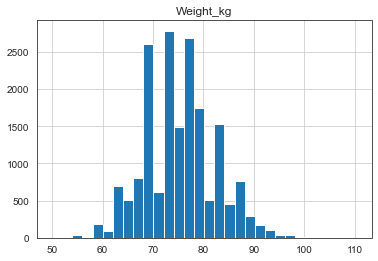

In [621]:
data['Weight_float'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight_float'].fillna(data['Weight_float'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)
data.hist(column='Weight_kg', bins=30)
plt.show()

**Task 1 (1 point)**. Built a histogram of the height distribution in *meters* from footbal player data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

(18207,)
(18159,)
       Height  Height_m
ID                     
158023    5'7    1.7018
20801     6'2    1.8796
190871    5'9    1.7526
193080    6'4    1.9304
192985   5'11    1.8034


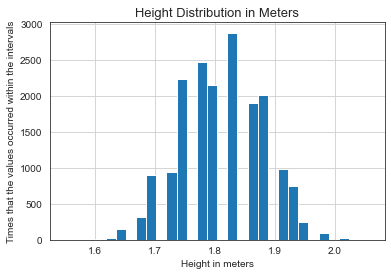

In [622]:
print(data['Height'].shape)
data=data.dropna(subset=['Height'])
print(data['Height'].shape)
#5ft × 0.3048 + 7in × 0.0254
feet_to_m=0.3048
inches_to_m=0.0254
data['Height_feet']  = data['Height'].str.extract(r'([0-9]+)\'([0-9]+)').astype(float)[0]
data['Height_inches']= data['Height'].str.extract(r'([0-9]+)\'([0-9]+)').astype(float)[1]
data['Height_m'] = data.apply(lambda row: row['Height_feet'] * feet_to_m+row['Height_inches'] * inches_to_m, axis=1)

print(data.loc[:,['Height','Height_m']].head())

data.hist(column='Height_m', bins=30)
plt.title('Height Distribution in Meters',fontsize='13')
plt.xlabel('Height in meters')
plt.ylabel('Times that the values occurred within the intervals')
plt.show()

Effective way to visualize the relationship between two features is to draw a simple _scatter plot_. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Example 4.** Visualize the dependence of _Strength_  on _Weight_kg_.

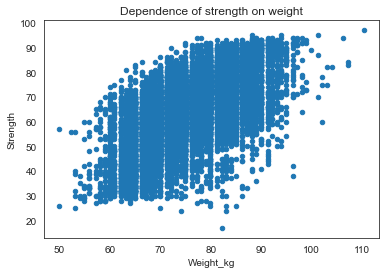

In [623]:
data.plot.scatter(x='Weight_kg', y='Strength')
plt.title('Dependence of strength on weight')
plt.show()

One more effective way of initial data analysis is to plot pairwise feature dependencies. That simply combines already considered Scatter plot and a histogram. We create $m \times m$ plots (_m_ is number of features) where pictures on diagonal represent **histograms** and outside the diagonal **scatter_matrix**. That can be done with the help of _scatter_matrix_ Pandas DataFrame method or _pairplot_ in Seaborn.

**Example 5.**
Illustrate pairwise dependencies between _ShortPassing_, _Dribbling_, _BallControl_ and _Strength_ features of footbal players.

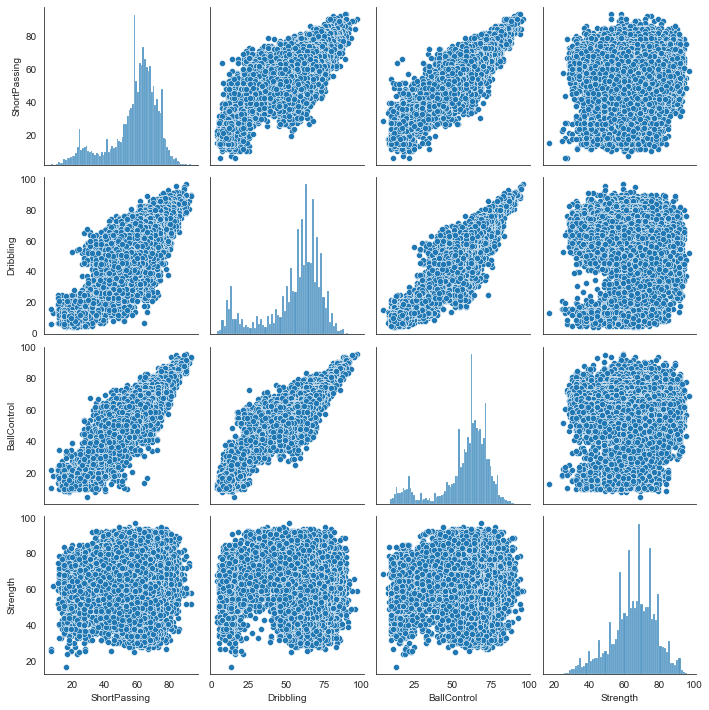

In [624]:
sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])

Histograms and scatter plots are good for continuous (numerical) features. Distribution of data by categorical features (that have a fixed number of possible values) can be represented with **bar charts**.

**Example 6.** Show distribution of players by age groups (under 20 yo. _young_, between 20-30 _mature_, over 30 yo. _masters_)

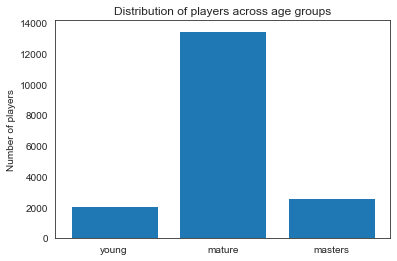

In [625]:
data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
distr = data.groupby('age_group').count().max(axis=1)[['young', 'mature', 'masters']]

plt.bar(distr.index, distr.values)
plt.ylabel('Number of players')
plt.title('Distribution of players across age groups')
plt.show()

Really often it is necessary to explore the distribution of some numerical feature based on the value of categorical one. Here comes the _boxplot_ of Seaborn library, which can show statistics of numerical features (mean, quantiles) by different value of categorical feature. Boxplot can also help to detect **outliers** - values that significantly differ from the rest. More detailed explanation [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

**Example 7.** Show _SprintSpeed_ statistics across different age groups.

_Hint_: in order to prevent printing the service information and make our pictures more attractive we can write `;` in the end of last line.

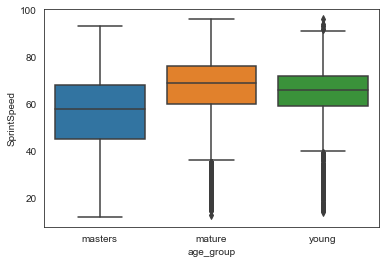

In [626]:
sns.boxplot(x='age_group', y='SprintSpeed', data=data);

## Part 2. Minimizing Mean Squared Error. Linear Regression

We are going to predict target numerical variable $y$ for _n_ samples with the help of $x_1, x_2, ..., x_m$ _m_ features under the assumption of _liner dependence_ existence between features and target, i.e.
$$\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$$
so that Mean Squared Error between $y$ and $\hat{y}$ was the lowest possible
$$MSE = \frac{1}{n}\sum_{i=1}^n {(y_i - \hat{y})}^2 -> min_{w_0, w_1, w_2, ...w_m}$$
where $w_0$ is "free" weight component called **intercept** and $(w_1, w_2, ... w_n)$ is a **vector of coefficients**.

 ### Part 2.1 Linear Regression with one variable

Just to understand the basic principles, let's try to predict _BallControl_ score based on the _Dribbling_ score for every player. Simple Linear Regression with one feature.
$$BallControl = w_0 + w_1 * Dribbling$$

We are going to do real data science, aren't we? So let us split the available data into train and test samples. We let our model see only the train data, then we can measure it's quality on test sample.

In [627]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

To illustrate the approach, let's use Ridge model from sklearn with _regularization_ param alpha=0. What does it mean and what it if for we will find out later on in this course. But for now I require avoiding regularization by setting regularization param to zero.

In [628]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0)

In [629]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = 12.524335626417695, w_1 = 0.8280241589241577


In [630]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [631]:
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

Name  Dribbling  BallControl  predicted_BallControl
ID                                                                      
158023           L. Messi       97.0         96.0              92.842679
20801   Cristiano Ronaldo       88.0         94.0              85.390462
190871          Neymar Jr       96.0         95.0              92.014655
193080             De Gea       18.0         42.0              27.428770
192985       K. De Bruyne       86.0         91.0              83.734413

Right now we have predictions for train and test samples. How about measure the quality of the model?

**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squared_error_)

In [632]:
import numpy as np
def mse(y_true, y_pred):
    #(1/N)Sum from i=1 to n(Y(i)-Ypredicted(i))^2 
    diff=y_true-y_pred # Vector of the shape (N,1)
    error = (1/diff.shape[0])*np.matmul(np.transpose(diff.reshape(-1, 1)), diff.reshape(-1, 1)).item(0) # Summ of squared differences = transpose(diff)*diff
    return error

In [633]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)


In [634]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 32.93437581207146, test MSE 33.07437321079724


**Task 3 (1.5 points).** Visualize the dependence of **test** _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score. Don't forget to add axis and plot names!

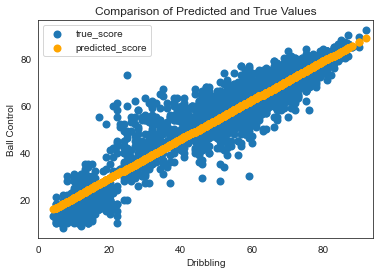

In [635]:
plt.title('Comparison of Predicted and True Values')
plt.scatter(X_test,y_test, label="true_score",linewidth=2)
plt.scatter(X_test,y_pred_test,color='orange',linewidth=2, label="predicted_score")
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.xlim(0,94)
plt.legend(loc="upper left")
plt.show()


### Part 2.2 Linear regression with many variables

**Task 4 (5 points).** Implement your own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*.

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients for linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

!!! IMPORTANT <br>
Please complete this assignment **without any cycles**. You may use the standard operations of matrix \ vector multiplication ans different statistic calculation with NumPy. Otherwise, your solution may not go through asserts.

In [636]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    """
    residuals = np.matmul(X,w.reshape(-1, 1))-y.reshape(-1, 1) 
    residuals = residuals.flatten()
    return residuals

In [637]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        w = np.zeros(X_train.shape[1])
        res = least_squares(compute_residuals, w, args=(X_train, y_train))
        
        if self.fit_intercept:
            self.coef_ = res.x[:-1] 
            self.intercept_ =res.x[-1] 
        else:
            self.coef_ = res.x[:] 
            self.intercept_ =0
                 
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [638]:

#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

Let's add more features in order to predict Dribbling score more accurately.

In [639]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_float', 'Weight_kg']
target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

In [640]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 37.011324858126045, test MSE 37.098046682145785


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21816e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [641]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5 = {lr.coef_}')

w_0 = 11.939009437267885, w_1, w_2, w_3, w_4, w_5 = [ 1.09606899 -0.05070967 -0.12911552 -6.29759881 13.75      ]


That is not ok, two last weight components are too large, and they vary depending on the run! Although the result seems better our model would behave unexpectadly to the patterns in data it has never seen! Large weights and weights instability are the sign of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).  <br><br>
According to the definition it is "_the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably_". But what does it actually mean?

Assume that we have a player whose weight in kg was calculated with some tiny error, let's say +=1g.

In [642]:
player = data[features + [target]].iloc[0:2]
player['Predicted_dribbling'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.186   
20801          94.0          81.0      79.0         183.0     83.082   

        Dribbling  Predicted_dribbling  
ID                                      
158023       97.0            96.219236  
20801        88.0            90.578803

Predictions are pretty good if the data is _pure_. Let's add some noise to _Weight_kg_ feature:

In [643]:
player['Weight_kg'] = player['Weight_kg'] + [-0.001, 0.001]
player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.185   
20801          94.0          81.0      79.0         183.0     83.083   

        Dribbling  Predicted_dribbling  Predicted_dribbling_with_error  
ID                                                                      
158023       97.0            96.219236                       96.205486  
20801        88.0            90.578803                       90.592553

Predicted dribbling value has changed significantly! Look at how this tiny **1g** error leads to extremly big or small dribbling!

The reason behind it is strange unstable behaviour is **collinearity** between Weight and Weight_kg features, what means that Weight_kg can be linearly predicted from Weight. As a matter of fact they represent the same essense but in different scales. <br><br>
**Multicollinearity** describes a more general case, when one feature can be predicted by linear combination of some other features.<br><br>
Collinearity is really close related to **correlation** - degree to which a pair of variables are linearly related. Collinearity origins from Linear Algebra and Geometry whereas Correlation is a term from Statistics. Anyway all of this three terms refer to **linearly dependent features**, which is really bad for Linear Models.

But why it is so bad? The main reason is that Linear Regression tries to capture the contribution of each feature to target _independently_, which obviously is not possible in terms of feature multicolliearity.<br><br>
There are a whole bunch of really interesting thoughts that can help to capture the intuition behind it [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r). I'd citate one of the examples provided.<br><br>
_Assume that two people collaborated and accomplished scientific discovery. It is easy to tell their unique contributions (who did what) when two are totally different persons (one is theory guy and the other is good at experiment), while it is difficult to distinguish their unique influences (coefficients in regression) when they are twins acting similarly._

There are a few approaches how to prevent overfitting and overcome multicollinearity.
- Drop features
- Combine features
- Regularization


Regularization is something we are going to speak about in the next modules. Combining features is problem-specific and could easily trigger a _holy_war_ due to ambiguity of approaches. Let's focus on simpliest - drop one of the features from the correlated pair.<br>
At first we need to define those pairs of features, **correlation matrix** comes to rescue! Each cell in the table shows the correlation between two variables. We use dataframe in-built method _corr_ in combination with seaborn _heatmap_.

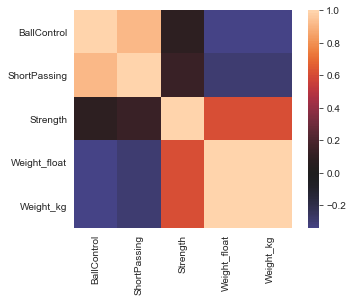

In [644]:
from seaborn import heatmap

heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [645]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg']
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.185   
20801          94.0          81.0      79.0         183.0     83.083   

        Dribbling  Predicted_dribbling  Predicted_dribbling_with_error  
ID                                                                      
158023       97.0            96.219236                       96.219357  
20801        88.0            90.578803                       90.578681

### Part 2.3 Putting all together

**Task 5 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. You **have to** use either your custom Linear Regression class or `sklearn.linear_model.Ridge` with regularization param alpha=0. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame (**0.5 points**)
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot feature correlation matrix. (**0.5 points**)
- Drop features that are highly correlated with each other (_abs_(corr) > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (**1.5 points**)
- Split data into train/test with some proportion (**0.5 points**)
- Train a model on train dataset, make predictions both for train and test. (**0.5 points**)
- Measure the model quality in terms of MSE in train and test samples,  (**0.5 points**)
- Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (**1 point**)

**Penalties**
- **-1 point** if used a different model besides custom Linear Regression or `sklearn.linear_model.Ridge` with regularization param alpha=0
- **-0.5 points** if number of selected features BEFORE removal of linearly dependent ones is less than 10.
- **-0.5 points** if did not remove linearly dependent features before training the model.

In [646]:
#Extract float number from Value field in DataFrame (0.5 points)
data = pd.read_csv("data.csv", index_col='ID')
pd.set_option('display.max_columns', None)
data.head()

data['Value_float'] = data['Value'].str.extract(r'([0-9/.]+)').astype(float)
data[data['Value_float'].isna()].shape[0]# no NAN values
data['Value_float']

ID
158023    110.5
20801      77.0
190871    118.5
193080     72.0
192985    102.0
          ...  
238813     60.0
243165     60.0
241638     60.0
246268     60.0
246269     60.0
Name: Value_float, Length: 18207, dtype: float64

In [647]:
#Сhoose more features that you expect to influence on player Value (at least 10)
data.head()

data['Wage_float'] = data['Wage'].str.extract(r'([0-9/.]+)').astype(float)
data['Height_feet']  = data['Height'].str.extract(r'([0-9]+)\'([0-9]+)').astype(float)[0]
data['Height_inches']= data['Height'].str.extract(r'([0-9]+)\'([0-9]+)').astype(float)[1]
data['Height_m'] = data.apply(lambda row: row['Height_feet'] * feet_to_m+row['Height_inches'] * inches_to_m, axis=1)
data['Weight_float'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight_float'].fillna(data['Weight_float'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)

features = ['Potential','Wage_float','International Reputation','Height_m','Weight_kg','Finishing','HeadingAccuracy','BallControl','Agility','Stamina','Strength','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Value_float']

data0=data[features]
data0=data0.dropna(how='any')
data0.dtypes


Potential                     int64
Wage_float                  float64
International Reputation    float64
Height_m                    float64
Weight_kg                   float64
Finishing                   float64
HeadingAccuracy             float64
BallControl                 float64
Agility                     float64
Stamina                     float64
Strength                    float64
Aggression                  float64
Interceptions               float64
Positioning                 float64
Vision                      float64
Penalties                   float64
Composure                   float64
Value_float                 float64
dtype: object

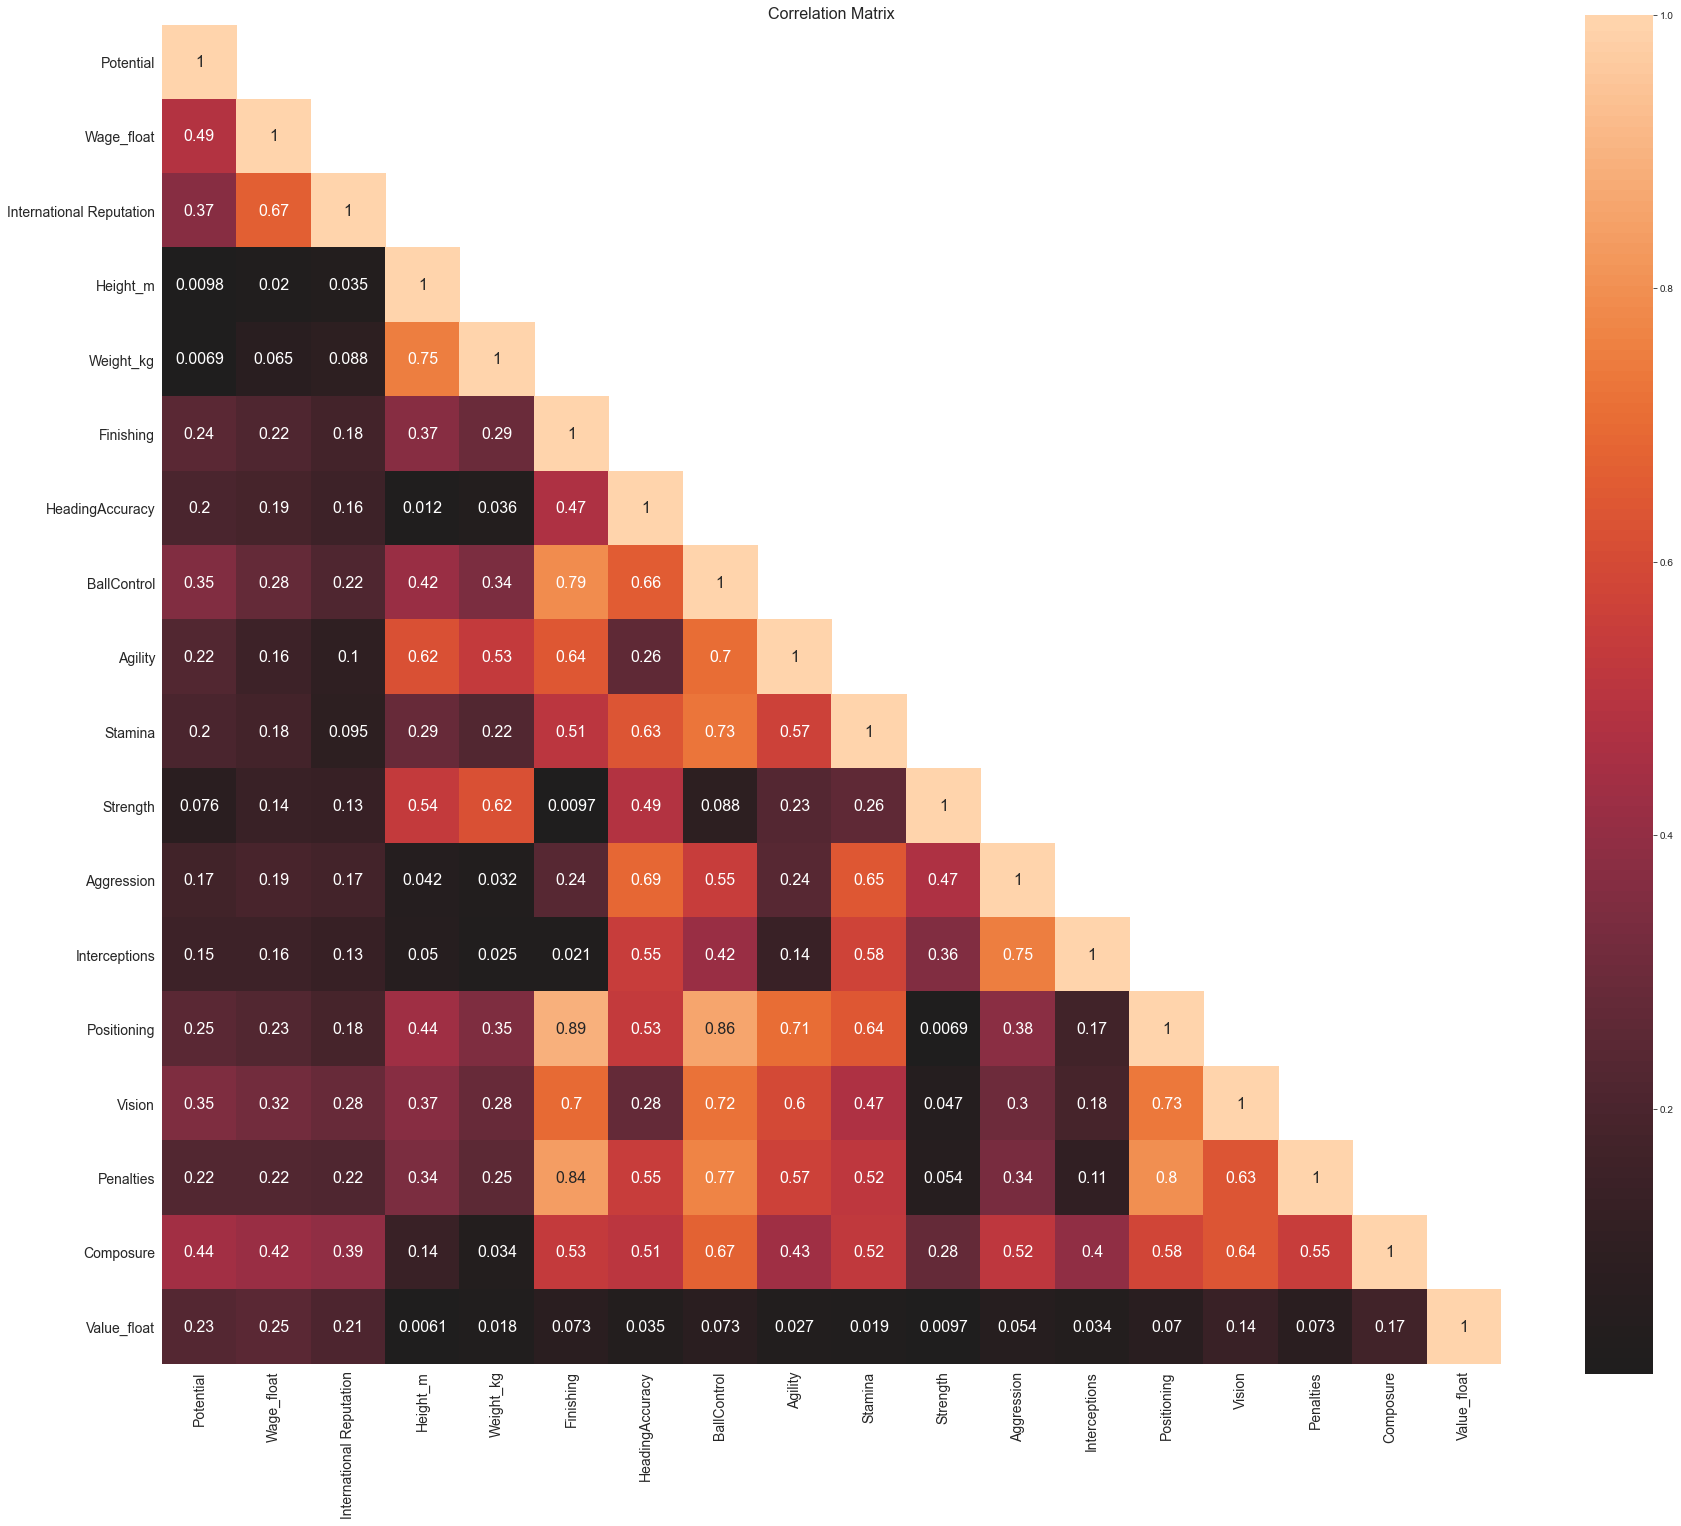

In [658]:
#Plot feature correlation matrix. (0.5 points)
plt.figure(figsize=(30,25))
corr_df =  abs(data0.corr(method='pearson'))
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
sns.heatmap(df_lt,annot=True,annot_kws={"size":16}, center=0, square=True)
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [649]:
#Drop features that are highly correlated with each other (abs(corr) > 0.9) one by one until no correlated pairs left. Hint: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (1.5 points)
#Correlated pairs:
t=data0.iloc[:,:-1].corr(method ='pearson').unstack().reset_index().sort_values(by=[0,'level_0'], ascending=[False,True])
t=t[t.level_0!=t.level_1]
t[0]=abs(t[0])
top_correlations=t[::2].head(15).values.tolist()
top_correlations


[['Finishing', 'Positioning', 0.8887895203697529],
 ['BallControl', 'Positioning', 0.8639148744095279],
 ['Finishing', 'Penalties', 0.8378270334762035],
 ['Penalties', 'Positioning', 0.8012682082474327],
 ['BallControl', 'Finishing', 0.7883760503926875],
 ['BallControl', 'Penalties', 0.7697912642253663],
 ['Height_m', 'Weight_kg', 0.7546782163284119],
 ['Aggression', 'Interceptions', 0.7518973264884491],
 ['Positioning', 'Vision', 0.734367312283938],
 ['BallControl', 'Stamina', 0.7286035026658301],
 ['BallControl', 'Vision', 0.7184112072423172],
 ['Agility', 'Positioning', 0.7081506118212955],
 ['Agility', 'BallControl', 0.7046036387314979],
 ['Finishing', 'Vision', 0.6972900050211492],
 ['Aggression', 'HeadingAccuracy', 0.6928469629181362]]

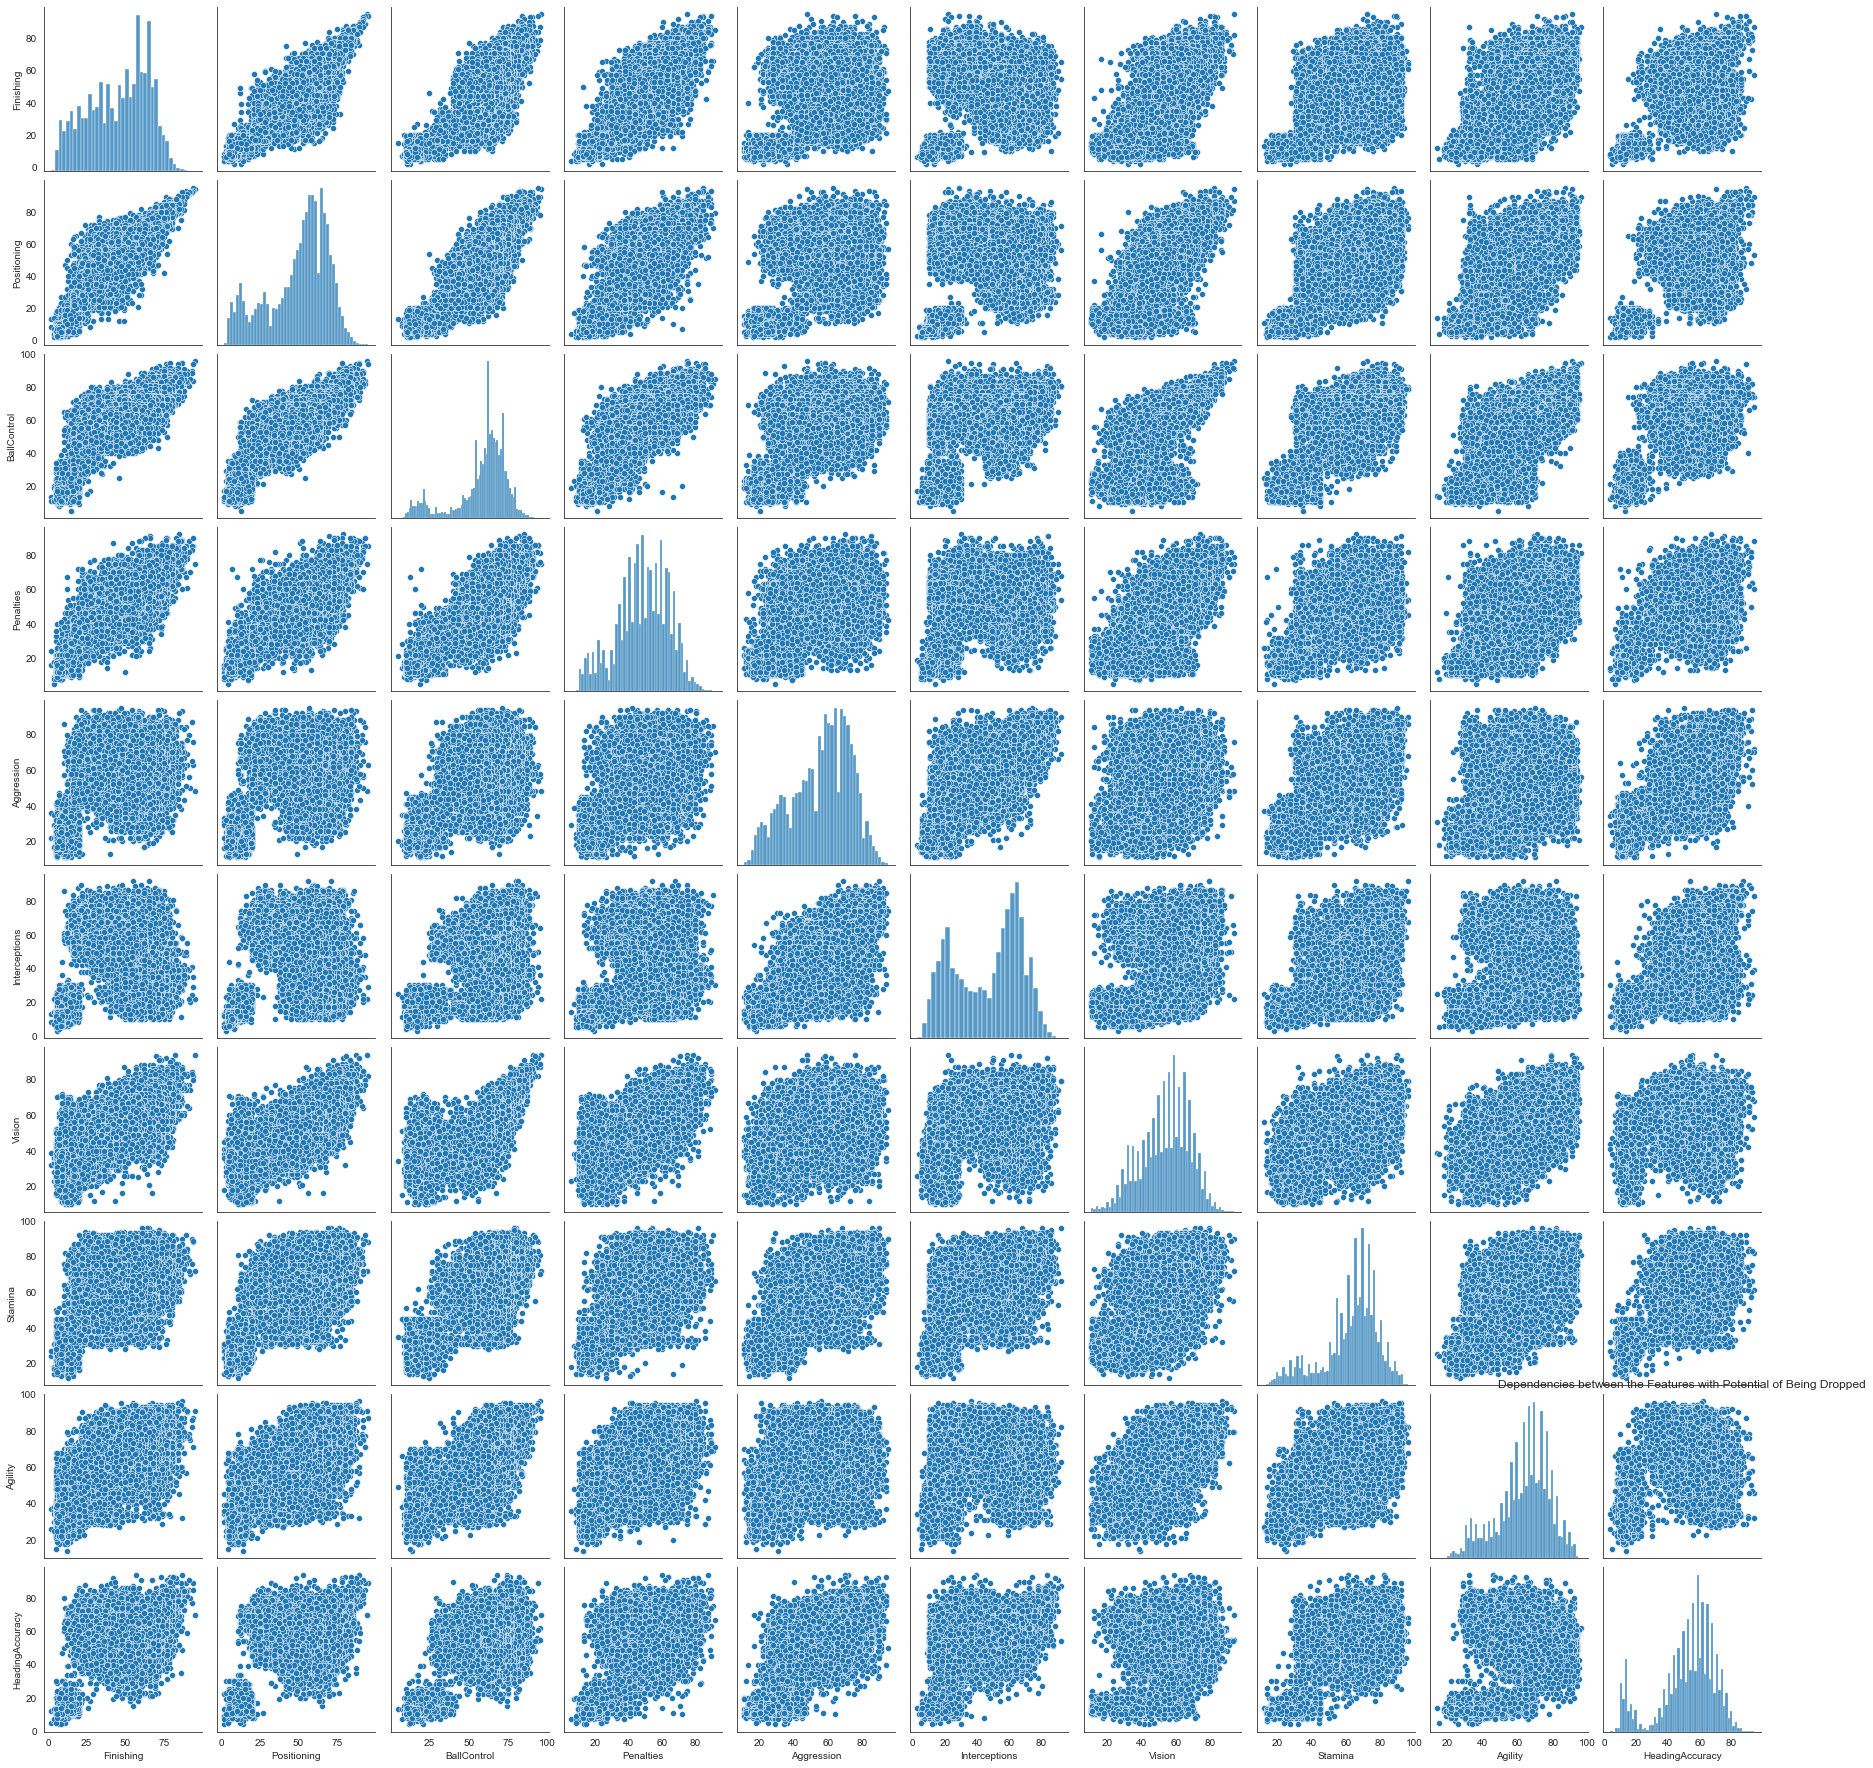

In [650]:
todrop=['Finishing', 'Positioning','BallControl', 'Penalties','Aggression', 'Interceptions', 'Vision','Stamina','Agility','HeadingAccuracy']
sns.pairplot(data0[todrop])
plt.title('Dependencies between the Features with Potential of Being Dropped')
plt.show()


In [651]:
data0.describe()

Potential    Wage_float  International Reputation      Height_m  \
count  18159.000000  18159.000000              18159.000000  18159.000000   
mean      71.319126      9.752574                  1.113222      1.812576   
std        6.134420     22.024398                  0.394031      0.067301   
min       48.000000      0.000000                  1.000000      1.549400   
25%       67.000000      1.000000                  1.000000      1.752600   
50%       71.000000      3.000000                  1.000000      1.803400   
75%       75.000000      9.000000                  1.000000      1.854200   
max       95.000000    565.000000                  5.000000      2.057400   

          Weight_kg     Finishing  HeadingAccuracy   BallControl  \
count  18159.000000  18159.000000     18159.000000  18159.000000   
mean      75.354524     45.550911        52.298144     58.369459   
std        7.079378     19.525820        17.379909     16.686595   
min       49.940000      2.000000         4.000000      5.000000   
25%       69.916000     30.000000        44.000000     54.000000   
50%       74.910000     49.000000        56.000000     63.000000   
75%       79.904000     62.000000        64.000000     69.000000   
max      110.322000     95.000000        94.000000     96.000000   

            Agility       Stamina      Strength    Aggression  Interceptions  \
count  18159.000000  18159.000000  18159.000000  18159.000000   18159.000000   
mean      63.503607     63.219946     65.311967     55.868991      46.698276   
std       14.766049     15.894741     12.557000     17.367967      20.696909   
min       14.000000     12.000000     17.000000     11.000000       3.000000   
25%       55.000000     56.000000     58.000000     44.000000      26.000000   
50%       66.000000     66.000000     67.000000     59.000000      52.000000   
75%       74.000000     74.000000     74.000000     69.000000      64.000000   
max       96.000000     96.000000     97.000000     95.000000      92.000000   

        Positioning        Vision     Penalties     Composure   Value_float  
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000  
mean      49.958478     53.400903     48.548598     58.648274    264.790754  
std       19.529036     14.146881     15.704053     11.436133    289.849427  
min        2.000000     10.000000      5.000000      3.000000      0.000000  
25%       38.000000     44.000000     39.000000     51.000000      4.400000  
50%       55.000000     55.000000     49.000000     60.000000    160.000000  
75%       64.000000     64.000000     60.000000     67.000000    475.000000  
max       95.000000     94.000000     92.000000     96.000000    975.000000

In [652]:
d1 = data0.drop(['Finishing' ,'BallControl', 'Penalties', 'Agility'], 1)
"""
data0.columns.get_loc('Finishing')
data0.columns.get_loc('BallControl')
data0.columns.get_loc('Penalties')
data0.columns.get_loc('Agility')
"""

d2=d1 
d2 = d2.drop(['Height_m','Weight_kg'], 1)
"""
data0.columns.get_loc('Height_m')
data0.columns.get_loc('Weight_kg')
"""

d3=d2
d3=d3.drop(['HeadingAccuracy', 'Interceptions'],1)
"""
data0.columns.get_loc('HeadingAccuracy')
data0.columns.get_loc('Interceptions')
"""
print(d1.shape)
print(d2.shape)
print(d3.shape)

(18159, 14)
(18159, 12)
(18159, 10)


In [653]:
#Split data into train/test with some proportion (0.5 points)
X_col=data0.columns[:-1]
y_col=data0.columns[-1]
X_train, X_test, y_train, y_test = train_test_split(data0[X_col].values, data0[y_col].values, train_size=0.8, random_state=2)

#X_train1=X_train.drop(['Finishing' ,'BallControl', 'Penalties', 'Agility'], 1)

print(data0.columns.get_loc('Finishing'))
print(data0.columns.get_loc('BallControl'))
print(data0.columns.get_loc('Penalties'))
print(data0.columns.get_loc('Agility'))
# 5,7,8,15
X_train1 = X_train[:, [0,1,2,3,4,6,9,10,11,12,13,14,16]]
X_test1 = X_test[:, [0,1,2,3,4,6,9,10,11,12,13,14,16]]

print(data0.columns.get_loc('Height_m'))
print(data0.columns.get_loc('Weight_kg'))
# 3,4
X_train2 = X_train[:, [0,1,2,6,9,10,11,12,13,14,16]]
X_test2 = X_test[:, [0,1,2,6,9,10,11,12,13,14,16]]

print(data0.columns.get_loc('HeadingAccuracy'))
print(data0.columns.get_loc('Interceptions'))
# 6, 12
X_train3 = X_train[:, [0,1,2,9,10,11,13,14,16]]
X_test3 = X_test[:, [0,1,2,9,10,11,13,14,16]]


print(data0.columns.get_loc('Aggression'))

X_train4 = X_train[:, [0,1,2,6,9,10,12,13,14,16]]
X_test4 = X_test[:, [0,1,2,6,9,10,12,13,14,16]]

print(X_train1.shape)
print(X_train2.shape)
print(X_train3.shape)
print(X_train4.shape)

5
7
15
8
3
4
6
12
11
(14527, 13)
(14527, 11)
(14527, 9)
(14527, 10)


In [654]:
#Train a model on train dataset, make predictions both for train and test. (0.5 points)
lr = LinearRegression()
check_estimator(lr)
lr.fit(X_train, y_train)
y_pred_train0=lr.predict(X_train)   
y_pred_test0=lr.predict(X_test)   

lr.fit(X_train1, y_train)
y_pred_train1=lr.predict(X_train1)   
y_pred_test1=lr.predict(X_test1) 

lr.fit(X_train2, y_train)
y_pred_train2=lr.predict(X_train2)   
y_pred_test2=lr.predict(X_test2) 

lr.fit(X_train3, y_train)
y_pred_train3=lr.predict(X_train3)   
y_pred_test3=lr.predict(X_test3) 

lr.fit(X_train4, y_train)
y_pred_train4=lr.predict(X_train4)   
y_pred_test4=lr.predict(X_test4) 

In [655]:
#Measure the model quality in terms of MSE in train and test samples, (0.5 points)
print(f'1st: train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')
print(f'2d: train MSE {mse(y_train, y_pred_train1)}, test MSE {mse(y_test, y_pred_test1)}')
print(f'3d: train MSE {mse(y_train, y_pred_train2)}, test MSE {mse(y_test, y_pred_test2)}')
print(f'4th: train MSE {mse(y_train, y_pred_train3)}, test MSE {mse(y_test, y_pred_test3)}')
print(f'5th: train MSE {mse(y_train, y_pred_train4)}, test MSE {mse(y_test, y_pred_test4)}')

1st: train MSE 129332.43655262483, test MSE 127184.16512106486
2d: train MSE 76727.30020052794, test MSE 76637.42841007351
3d: train MSE 76759.82279486403, test MSE 76678.73481052993
4th: train MSE 76768.9991884776, test MSE 76682.80361435928
5th: train MSE 76814.13547868219, test MSE 76709.00465999433



1) Why did you take these particular features? 

Some of these features were taken based on an article I found online(such as 'International Reputation'). The others were taken in such a way so that they would be able to decribe some aspect of a player in a sufficient manner.
So Potential, Wage_float, International Reputation describe a player from a public point of view.
Height_m, Weight_kg characterize a player from a physical perspective.                   
Finishing,HeadingAccuracy,BallControl,Interceptions,Positioning,Penalties - professional characteristics and skills of a player                 
Agility,Vision,Stamina,Strength,Composure,Aggression - psychological, physical, skill-like characteristics

2) Can you find a logical explanation for high correlation of some of your features? 

As can be seen from the table below, there could be some intresting for the high correlation between the features.
 * It seems that the features 'Finishing', 'Positioning', 'BallControl', 'Penalties' have quite high correlations in some combinations. The probable explanation for this is that the feature 'Positioning' probably has an influence on (direct//indirect)the role the player has in the team. Consequently, if they are at the gates they usually have low probability of 'Finishing' and 'Ballcontrol'. The 'Penalties' are usually assigned to the players who control the ball around the field, rather than those who defend the gates. On the other hand, the players who control the ball would have higher chances of 'Finishing' and and higher skill at 'Ballcontrol'.
 *  'Height_m' and 'Weight_kg' seem to have a high correlation. As they are features that describe a human, it's highly probable that most people doing the same type of sport, doing the same training and similar diating would develop similar proportions in body type. There are,of course,other body types participating in this game - which is why the correlation is only 75% - but it does not negate the fact that a certain body type/proportions of height and weight are predominant in this game. (It would be worth it to create a new feature 'Ratio'= Weight/Height and analyze the results. Unfortunately I was out of time.) 
 * The Features 'Aggression','Interceptions' have a high correlation. It wouldn't be surprising that a person easily becoming aggressive would be good at such a violent disrupting tactic as Interceptions. While they are not couse and consequence, there are probaly person characteristics that forward both of the features.
 * As it was  discussed in the first point 'Positioning' is influenced by and influenced in return directly and indirectly the features 'Vision', 'BallControl','Stamina Agility', 'Positioning'. That is probably what is reflected in the high correlation values. 

| First Feature | Second Feature | Absolute Correlation |
| ------------- | ------------- |-------------|
| Finishing | Positioning |0.8887895203697529 |
| BallControl | Positioning | 0.8639148744095279 |
| Finishing | Penalties | 0.8378270334762035 |
| Penalties | Positioning | 0.8012682082474327 |
| BallControl | Finishing | 0.7883760503926875 |
| BallControl | Penalties | 0.7697912642253663 |
| Height_m | Weight_kg | 0.7546782163284119 |
| Aggression | Interceptions | 0.7518973264884491 |
| Positioning | Vision | 0.734367312283938 |
| BallControl | Stamina | 0.7286035026658301 |
| BallControl | Vision | 0.7184112072423172 |
| Agility | Positioning | 0.7081506118212955 |
| Agility | BallControl | 0.7046036387314979 |
| Finishing | Vision | 0.6972900050211492 |
| Aggression | HeadingAccuracy | 0.6928469629181362 |


 From the table above it can be seen that there are some rather strong correlations in this dataset. And though they are not over the limit 0.9, I thought that the correlation was high enough to influence the linearly dependent features. Therefore I deleted some of these columns in different combinations in a step by step fashion:
   * X_train, X_test - the set of the features remaines the same except for the target feature Value_float 
   * X_train1, X_test1 - the features 'Finishing', 'BallControl', 'Penalties', 'Agility' were deleted from X_train, X_test  correspondingly as they have quite high correlation with the feature 'Positioning' ('Agility' had high correlation with both 'BallControl' and 'Positioning', and they in turn had even higher correlation between themselves). I chose 'Positioning' as the "leftover" feature as from theoretical background (an online article) it seemed the most influential. From the pairwise plot it could be seen that the change in 'Positioning' generally influence the other features in a linear way.
   * X_train2, X_test2 - from X_train1, X_test1 the features 'Height_m','Weight_kg' were deleted. As they had a rather small correlation with the target value this set of matrices is an experiment on whether the results of the linear regression will improve by the removal of seemingly not very important features.
   * X_train3, X_test3 - from X_train2, X_test2 the features 'HeadingAccuracy','Interceptions' were taken out. Both have high correlation values with 'Agression'
   * X_train4, X_test4 - from X_train2, X_test2 the features 'Agression' were taken out. Both have high correlation values with 1st: 'HeadingAccuracy','Interceptions'
   The 4th and 5th linear regressions are computed to compare the results of removing one feature high correlated with two other features and removing two features high correlated with the one. 

3) Are you satisfied with the quality of predictions?


| Linear Regression Number | Train MSE  | Test MSE |
| -------- | -------- | -------- | 
| 1 | 129332.43655262483 | 127184.16512106486 | 
| 2 | 76727.30020052794 | 76637.42841007351 | 
| 3 | 76759.82279486403 |  76678.73481052993 | 
| 4 | 76768.9991884776 | 76682.80361435928 | 
| 5 | 76814.13547868219 | 76709.00465999433 | 

As it can be seen from the table Lin.Reg.1 in almost 1.5 times bigger than Lin.Reg.2 for both Training and Testing MSEs. Which means between the first and the second, the second is preferrable (we minimize the error).
By looking at the results of the Lin.Reg.3 we can say that removing private physical information has slightly increased the MSE (made it worse), so these features (even though they had low correlations with Value_float) probably had some value. Their final use should be decided after a discussion or defining of a max allowable difference between the best MSE and MSE with a bit worse value. The theoretical importance of the features must be considered. A new feature might be introduces (Ratio as it has been described above)
The 4th Lin. Reg. shows that leaving only 'Agression' and removing 'HeadingAccuracy','Interceptions' increases MSE for both training and testing samples. However, as it was in the previous case, leaving or removing the features depends not only on the error but on the theoretical background (hypothesis) and the definition of how much worse is bad.
The 5th Lin. Reg. demonstrates that removing 'Agression' and leaving 'HeadingAccuracy','Interceptions' increases MSE for both training and testing samples. It can be understood as the features 'HeadingAccuracy','Interceptions' have a high correlation with a feature, then it is possible that there are some kind of influence or influenced on relationships between these 3 features or an undefined feature.
Out of the 5 described her Lin.Reg. the second performed the best.Also, it seems that if the correlation is less than 75%, in the higher part of the range, the linear regression does not benefit from removing these features from the matrix.

I'm not quite happy with the quality of predictions. The errors with values over 70000 are rather bad.
However we must take into account that these Lin.Reg. took in only numerical continuous features and completely ignored categorical(they had other types of columns (string, bool, etc)). Their processing method can be bulky, but they contain a great amount of information - categories that assume that there are certain similarities between the objects contained in a single category. THeir use could eliminate some numerical outliers and some continuous features.


